<a href="https://colab.research.google.com/github/JuanCGarciaA/SummerSong/blob/main/SummerSong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUMMER SONG**

**INTRODUCCIÓN**


La música ocupa un gran espacio en nuestra vida, ya sea de forma voluntaria o no, escuchamos canciones en todos lados o de forma personal con nuestro auriculares; sin embargo, esté hecho no es reciente, desde hace muchos años la música nos ha ayudado como expresión a nuestra forma de vida, pensamientos, ideales, etc.

Hoy en día hay una infinidad de canciones, debido a que cada año emergen nuevos cantantes, compositores, canciones e incluso  los géneros musicales evolucionan o se crean nuevos.

Sin embargo, la música es un gran negocio, en el cual el éxito implica una gran cantidad de dinero; el ejemplo más grande que tenemos de ello es Michael Jackson(D.E.P.), que a pesar de ya haber fallecido, estamos seguros de que sigue generando miles de dólares, por no decir millones por su canción ‘Thriller’.

El propósito de esté trabajo, es saber que es lo que hace a una canción popular, porque sabemos que hay canciones que tienen buenas interpretaciones, sin embargo, estas no son tan populares o puede que si, es por ello que, a través de ciertos elementos proporcionados de varias canciones, analizaremos estos y veremos si podemos llegar a una conclusión a través de ellos.



# Desenlace del trabajo

In [ ]:
#Importamos las librerias necesarias para este caso.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from math import sqrt
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

In [ ]:
#Accedemos a nuestro archivo
songs = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
#Hacemos una pequeña visualización de nuestro archivo
songs.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


**Hacemos la limpieza de nuestro archivo**



In [ ]:
#Obtenemos el nombre de todas nuestras columnas.
songs.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
#Borramos la columna Unnamed: 0, porque representa un index que ya no nos es util.
songs = songs.drop("Unnamed: 0", axis=1)

In [ ]:
#Analizamos que no tengamos valores nulos, afortunadamente estos son mínimos.
songs.isna().sum()

,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0
key,0


In [ ]:
#Borramos enseguida esos valores.
songs= songs.dropna()

**Análisis Inicial**

Hemos decidido hacer el análisis propuesto por el instructor para realizar parte de nuestro análisis inicial, con la biblioteca que se nos ha enseñado: ydata-profiling.

In [ ]:
#Instalamos la biblioteca que necesitamos
!pip install ydata-profiling


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(songs, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Creamos nuestro análisis:

In [ ]:
#Le damos un nombre a nuestro reporte
perfil = ProfileReport(songs, title = "Analisis de datos musicales")
perfil.to_notebook_iframe()


Gracias al análisis anterior nos percatamos que teníamos datos duplicados, y como sabemos hemos de eliminarlos para que estos no afecten a nuestro análisis inmediato, así como a la creación de nuestro modelo de ML.


In [ ]:
#A continuación borramos nuestro registros duplicados.

songs = songs.drop_duplicates()


In [ ]:
#Y finalmente ya no tenemos valores duplicados.
songs.duplicated().sum()

np.int64(0)

In [ ]:
#Al final tenemos el total de columnas y filas siguientes:
songs.shape

(113549, 20)

**Validación de Variables**

Por otro lado hemos de analizar el tipo de variables que tenemos, ya que algunas de ellas debido a su tipo no podemos agregarlas al momento de analizarlas, por ello nos enfocaremos en las que son de tipo text, boolean y categorical.

Enfocándonos en las que son del tipo text : track_id, artists, album_name, track_name y track_genre ; podemos omitirlos ya que no podemos trabajar con de forma numérica en nuestro modelo más adelante.

Los categóricos: mode y time_signature. Donde el primero representa la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor se representa con 1 y menor con 0. Y del segundo no encontramos su significado, pero consideramos que podría significar  el compás o firma de tiempo indica cómo se organiza el ritmo de la canción. Así que decidimos incluirlas en nuestro análisis.

La variable de explicit es la del tipo boolean, debido a que esta,  indica tal y como lo dice su nombre, si una canción es explícita o no, decidimos incluirla pero no de ese modo ya que los valores que presenta son False y True, agregando una nueva columna que los represente con los valores 1 y 2 respectivamente, , es decir, cambiandolos a un valor numérico.


**Consideración de Ceros**

Los valores cero a veces se utilizan cuando no se tiene el valor de dicho dato, en vez de usar un valor null, sin embargo, consideramos que para nuestro caso si son posible que los valores cero no signifiquen lo anterior. En popularity, puede haber canciones que no sean populares. Para la variable key que representa la tonalidad de la pista, es decir, los enteros se asignan a alturas usando la notación estándar de clases de altura. Por ejemplo, 0 = C, entonces cero si tiene un valor como tal.

Y para instrumentalness, predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran instrumentales en este contexto. Las pistas de rap o de palabra hablada son claramente vocales. Cuanto más cercano esté el valor de instrumentalidad a 1.0, mayor será la probabilidad de que la pista no contenga voces. Por lo tanto el valor cero si tiene un valor significativo.

Considerando todo lo anterior, para esas tres variables, no es necesario que borremos los valores ceros o que representen falta de información.



**Ánalisis Inmediato II**

In [ ]:
#Separamos las variables que sean string, no porque no tengan información valida
#Si no porque solo nos enfocaremos en las numericas:
songstwo = songs.loc[:,'popularity':'time_signature']

A continuación hemos de hacer el cambio para la variable "explict"

In [ ]:
#Creamos una función que nos ayude a asignar estos valores de acuerdo a los que
#ya tenemos en nuestro archivo
def explicito(datos):
  if datos is False:
    return 1
  else:
    return 2


In [ ]:
#Aplicamos la función agregando una nueva columna, con el nombre en español.
songstwo['explicito'] = songstwo['explicit'].apply(explicito)

In [ ]:
#Y enseguida borramos la que ya teniamos inicialmente, pues ya tenemos la nuestr
songstwo = songstwo.drop('explicit', axis=1)

In [ ]:
#Finalmene es así como nos queda nuestro dataframe al final:
songstwo.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicito
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,1
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1


A pesar de que en al análisis anterior se creó un mapa de calor que nos muestra la correlación de las variables, decidimos hacer uno aparte, en el cual se nos muestran los valores de tal correlación. Hemos observado que en el generado automaticamente, únicamente  se toman en cuenta los valores que sobrepasan el 0.5, ya sea de forma negativa o positiva.
La matriz que se muestra a continuación fue la elaborada por nosotros:


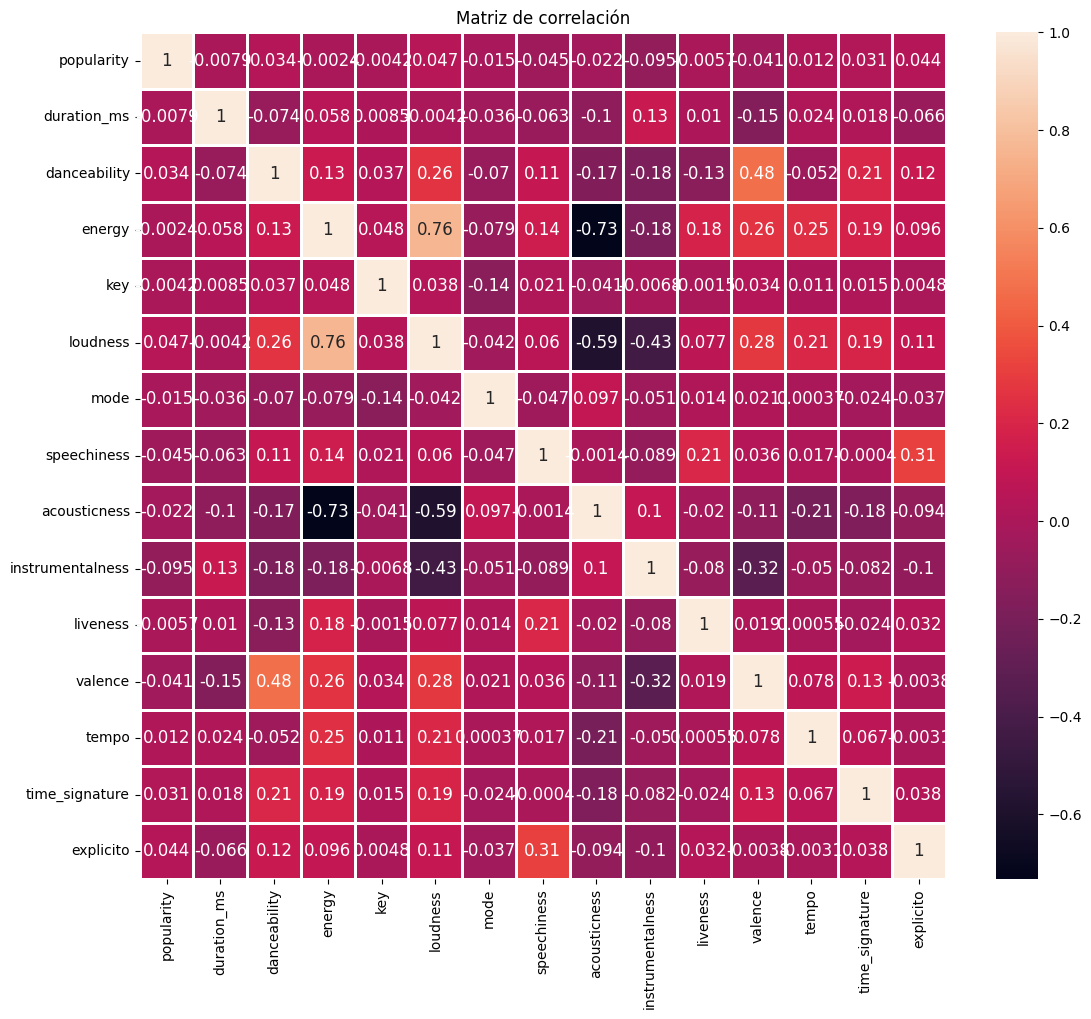

In [ ]:
from pickle import TRUE
#Crearión de la matriz de correlación
matriz = songstwo.corr()
plt.figure(figsize=(13, 11))
sns.heatmap(matriz, annot =  True, annot_kws= {'size':12}, linewidths = 0.75, linecolor = "white")
plt.title("Matriz de correlación")
plt.show()

Como podemos observar hay algunas variables que destacan en cuanto a su relación, las cuales son:

Correlaciones fuertes:
* acousticness - energy : tienen una correlacion negativa (-0.73)
* loudness - energy:  correlación positiva (0.76)
* loudness - acousticness: correlacion negativa (-0.59)

Correlaciones leves:
* valance- danceability: correlación negativa (0.48)
* explicito - speechiness : correlacion positiva(0.31)
* loudness - instrumentalness: correlación negativa(-0.43)


** Preparación para el Modelo **

In [ ]:
#Analizamos los valores que tenemos con respecto a nuestra variable de
#importancia
songstwo['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

Dado que temos una distribución muy separada de los valores, podemos hacer una clasifiación que los engoble, de tal manera que nos permita crear un modelo no tan profundo pero efectivo.

In [ ]:
def clasificacion(data):
  if data['popularity'] <40:
    return 1
  elif data['popularity'] >= 40 and data['popularity'] < 60:
    return 2
  elif data['popularity'] >= 60 and data['popularity'] < 80:
    return 3
  else:
    return 4

In [ ]:
songstwo['popu_clasificacion'] = songstwo.apply(clasificacion, axis=1)

In [ ]:
songstwo.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicito,popu_clasificacion
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,1,3
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,1,2
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,1,2
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,1,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,1,4


**MODELO DE MACHINE LEARNING**

In [ ]:
#Primero seleccionamos nuestro valores, para este caso como queremos llegar a
#la variable popularity, X serán todas las variables a excepción de esa.
X = songstwo.drop(columns = ['popu_clasificacion','popularity'])
y = songstwo['popu_clasificacion']

In [ ]:
#Hacemos la división de los datos para train.
X_train, X_temp, y_train, y_temp = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
#Y los datos para el test.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size= 0.5, random_state=42)

In [ ]:
# Ahora tenemos los siguientes conjuntos de datos:
# - X_train: Características de entrenamiento
# - y_train: Etiquetas de entrenamiento
# - X_val: Características de validación
# - y_val: Etiquetas de validación
# - X_test: Características de prueba
# - y_test: Etiquetas de prueba

#Imprimimos las longitudes de los conjuntos de datos para verificar
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 79484
Tamaño del conjunto de validación: 17032
Tamaño del conjunto de prueba: 17033


In [ ]:
#Creamos nuestro modelo
modelo_dtc = DecisionTreeClassifier(min_samples_leaf= 5, random_state=42, max_depth= 5)
modelo_dtc

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
#Entrenamos el modelo
modelo_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
predicciones = modelo_dtc.predict(X_test)
predicciones

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# Calcula la precisión del modelo en el conjunto de prueba
precision = np.mean(predicciones == y_test)
print(f'Precisión del modelo en el conjunto de prueba: {precision:.2f}')

# Realiza validación cruzada para obtener una estimación más robusta de la precisión
scores = cross_val_score(modelo_dtc, X, y, cv=5)  # 5-fold cross-validation
print(f'Precisión de validación cruzada: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})')

Precisión del modelo en el conjunto de prueba: 0.58
Precisión de validación cruzada: 0.56 (+/- 0.02)


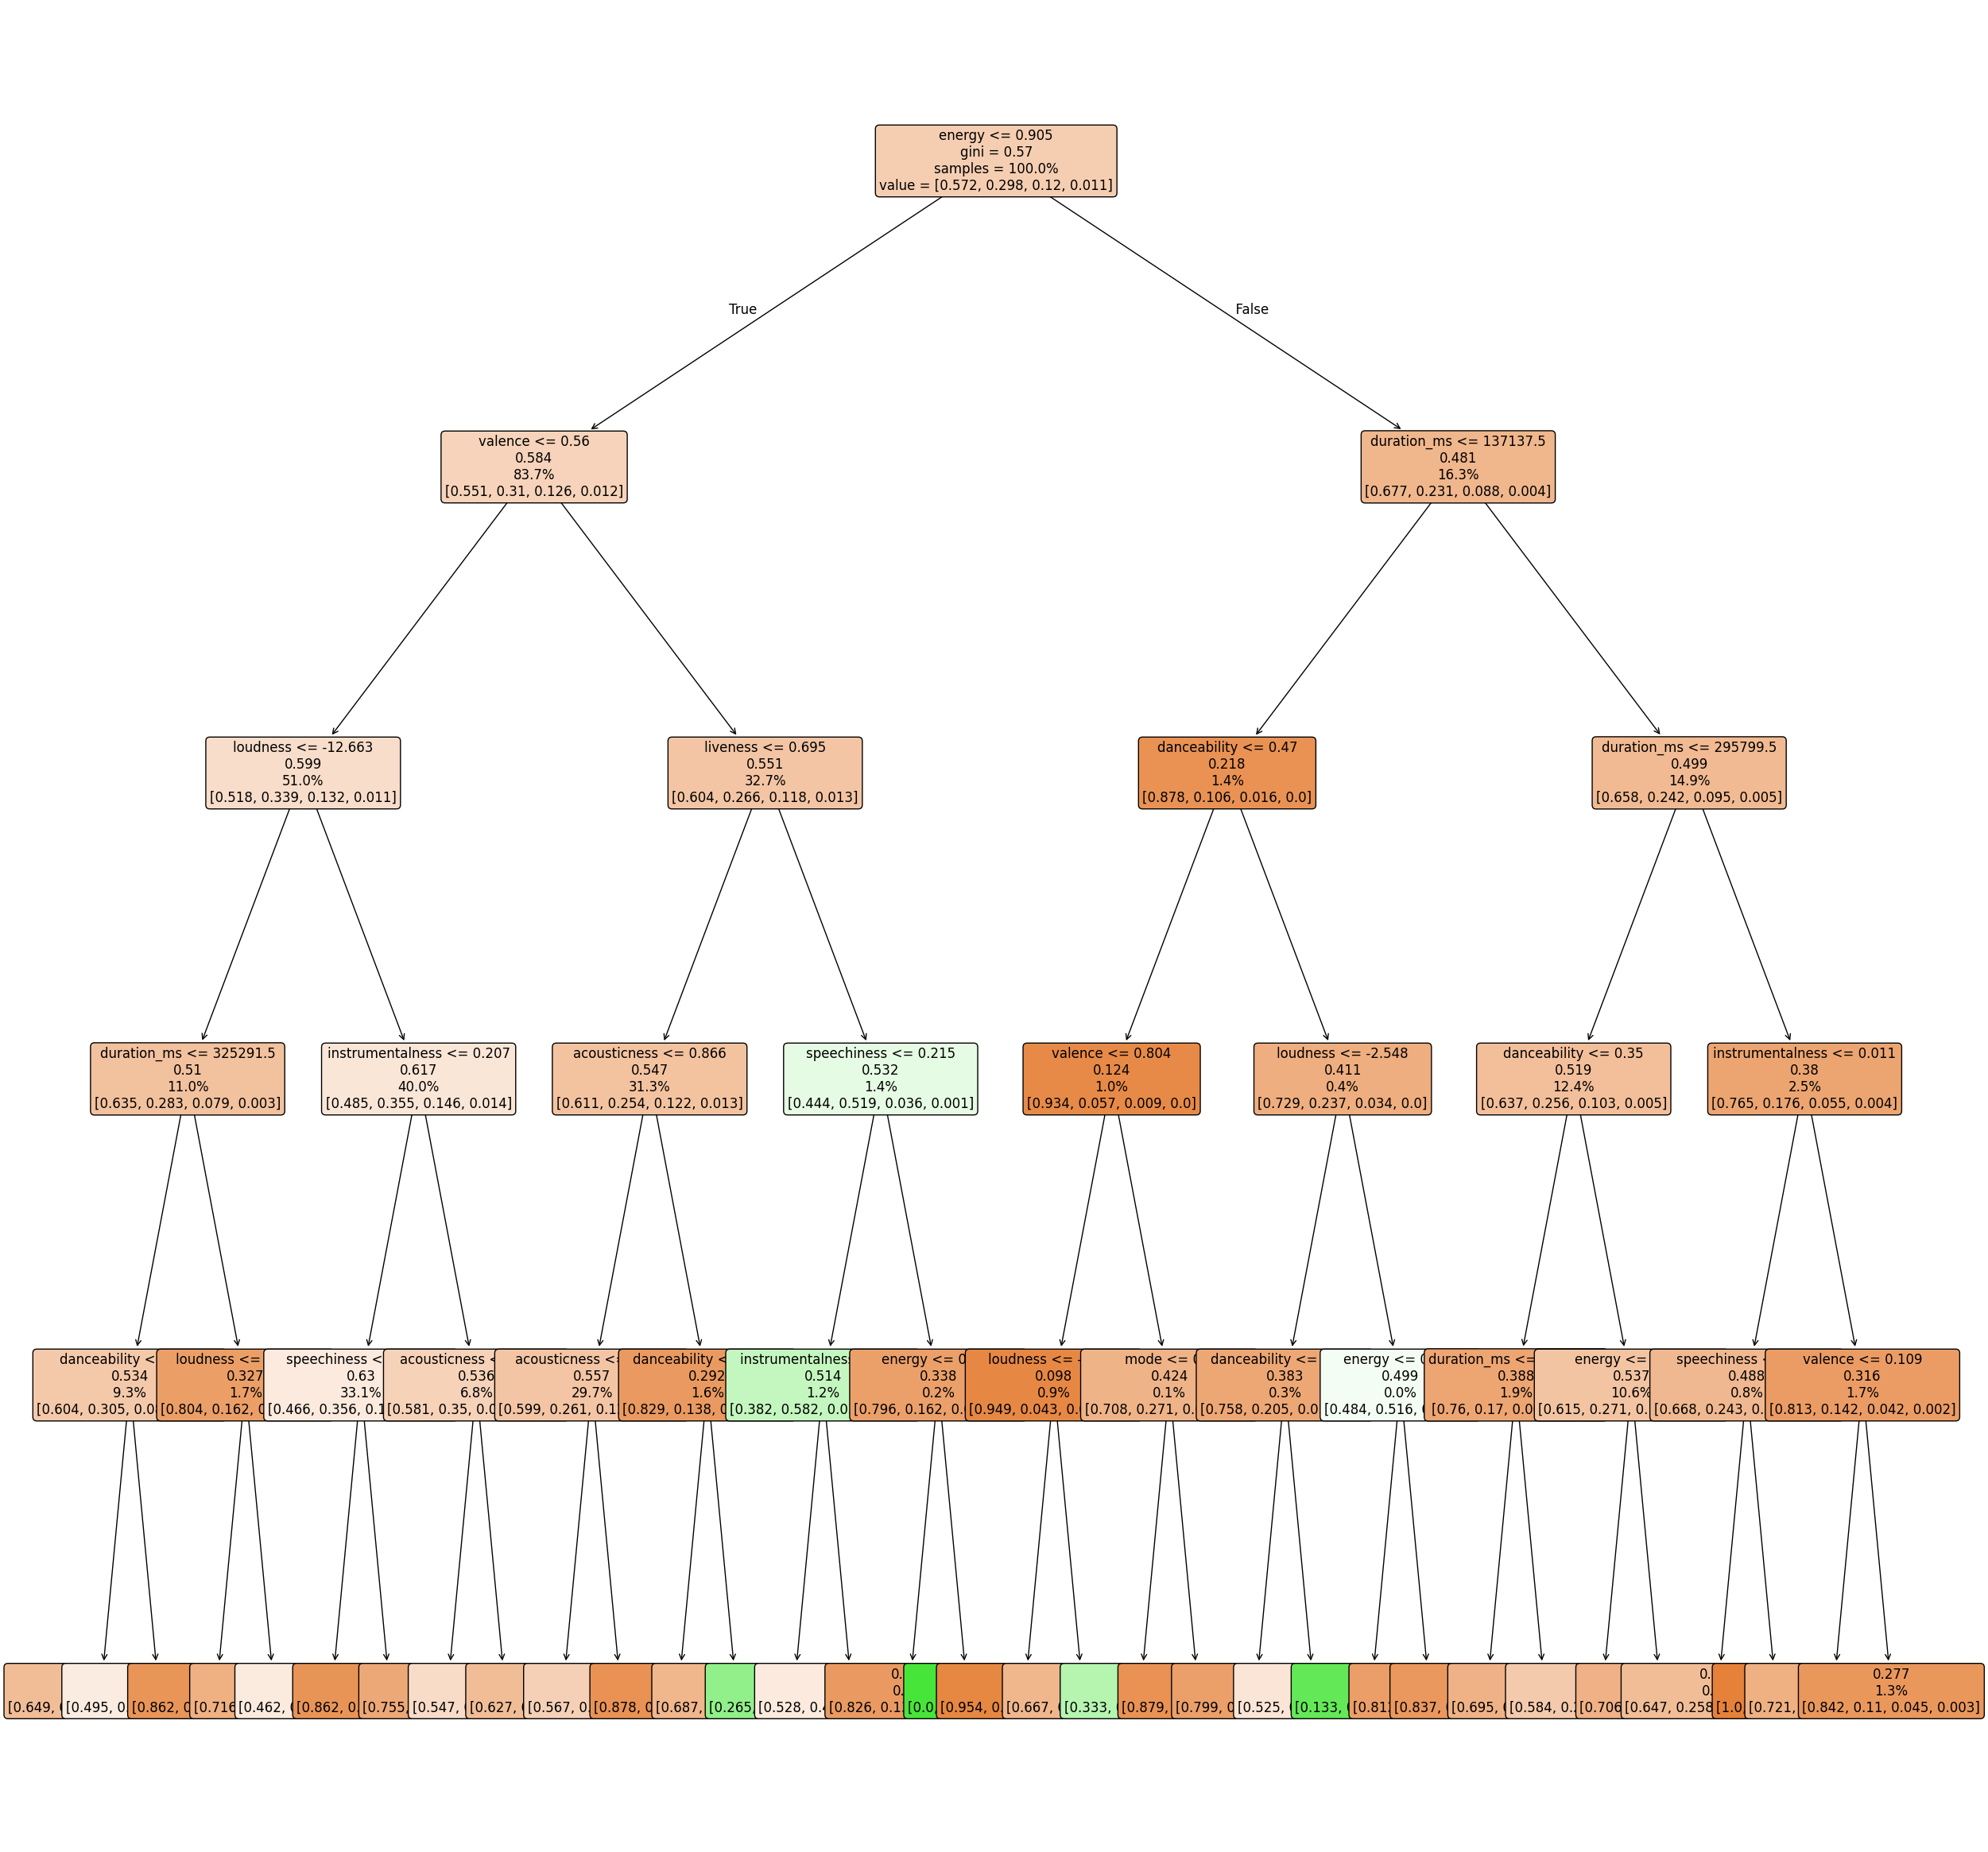

In [ ]:
#Realizamos el grafico de nuestro árbol
plt.figure(figsize=(30,30))
arbol = plot_tree(modelo_dtc, filled=True, feature_names = X.columns, fontsize= 12, label = 'root', proportion = True, rounded= True)
plt.show()

In [ ]:
#Como nos es imposible visualizar de buena manera el árbol creado, entonces lo
#convertiremos en un archivo pdf.
import graphviz

In [ ]:
dot_data = export_graphviz(modelo_dtc, feature_names=X.columns, filled=True, rounded=True, special_characters=True)

In [ ]:
graph = graphviz.Source(dot_data)
graph.render("/content/drive/MyDrive/A/SummerSongFinal")
graph.view()

'/content/drive/MyDrive/A/SummerSongFinal.pdf'

**Conclusiones**

A traves de este trabajo pudimos encontrar los siguientes puntos:
1.  La variable **energy** es la que encabeza nuestro árbol, por lo que las canciones deben ser si o si, canciones enérgicas, es decir, que se persivan como intensas. Ya que es la variable que tiene mayor consideración.
2. Seguido de energy, tenemos la variable **valance**. Concluimos que si queremos tener una canción exitosa, esta debe dar un sentimiento de alegría, felicidad, debe ser positiva. Lastima, hay canciones con increíbles letras pero dan una sensación de tristeza.
3. Despues tenemos a **duration_ms**, traduciendo a que una canción debe ser lo suficientemente larga, aproximadamente de cuatro minutos.
4. Tambien se debe considerar el valor de los decibeles,  ya que la variable **loudness**, se muestra influyente para la popularidad de la canción. Esto implica que la canción ni debe ser muy ruidosa pero tampoco tan suave.


Generalizando, una canción debe ser instensa de manera positiva, que transmita felicidad, con una duracion moderada y con una buena armonía, puede llegar a ser popular.

Y aunque es cierto que hemos descubierto algunas variables que pueden afectar a la calidad de las canciones para que estas sean populares; sin embargo, que sea popular no significa que sea aceptada por el público, actualmente el marketing puede apoyar a que una canción sea popular, pero puede ser de mala manera, por fama del artista, etc.  
Además debe considerarse tambien el gusto de la gente, así como los estilos de moda que se encuentren en ese momento; pues nosotros consideramos que de cierta manera eso influye en que una canción sea popular.
